In [154]:
%load_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
from sklearn.preprocessing import normalize, StandardScaler
from utils import preprocess_agreement_score_dataset, logit_transform

# Factor to shift 1s and 0s by to allow for log transformation
BODGE_FACTOR = 0.5

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [155]:
# ISOLATION_METRICS = ['isolation_distance', 'nn_hit_rate', 'nn_miss_rate', 'd_prime', 'l_ratio', 'silhouette_score']
ISOLATION_METRICS = ['nn_hit_rate', 'nn_miss_rate', 'd_prime', 'l_ratio', 'silhouette_score']

In [156]:
# Path to datastore
data_path = '/home/mclancy/truespikes/data/static_tetrode_dataset.hd5'
data = preprocess_agreement_score_dataset(data_path)

data['True Unit'] = data['agreement_score'] >= 0.2
scaler = StandardScaler()
data[ISOLATION_METRICS] = scaler.fit_transform(data[ISOLATION_METRICS])

transformations = {'d_prime': lambda x: np.log(x+1),
                   'nn_hit_rate': lambda x: np.log(x+1),
                   'nn_miss_rate': lambda x: np.log(x+1),
                   'silhouette_score': lambda x: x,
                   'l_ratio': lambda x:  np.log(x+1),
                   'agreement_score': logit_transform}

for metric_name, transformation in transformations.items():
    data[metric_name] = transformation(data[metric_name])

Loaded from cache


/home/mclancy/.local/share/.pyenv/versions/3.8.3/envs/truespikes/lib/python3.8/site-packages/tables/array.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (oid, self.atom, self.shape, self._v_chunkshape) = self._open_array()
/home/mclancy/.local/share/.pyenv/versions/3.8.3/envs/truespikes/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())
/home/mclancy/.local/share/.pyenv/versions/3.8.3/envs/truespikes/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


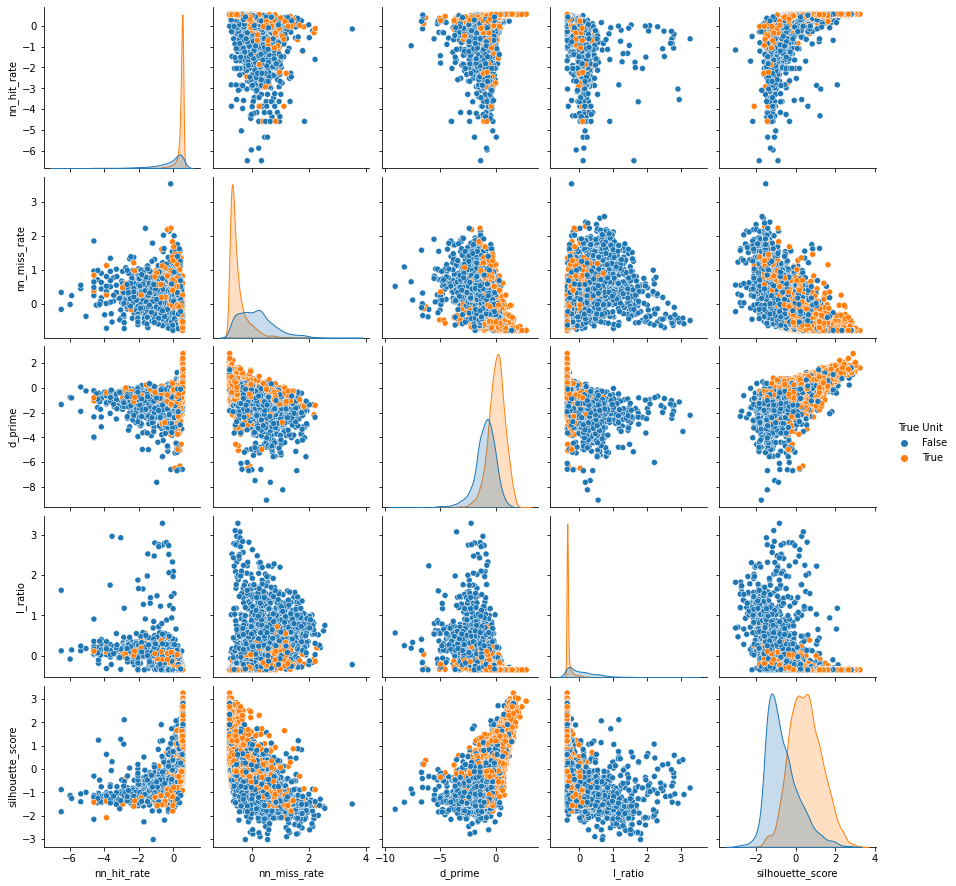

In [142]:
sns.pairplot(data, vars=ISOLATION_METRICS, hue='True Unit')

In [143]:
# sns.kdeplot(data['isolation_distance'], hue=data['True Unit'])

<AxesSubplot:xlabel='d_prime', ylabel='Density'>

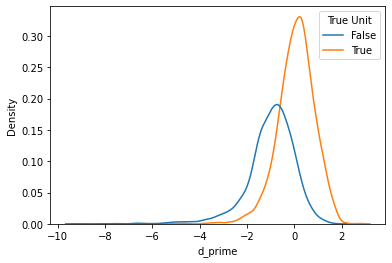

In [144]:
sns.kdeplot(data['d_prime'], hue=data['True Unit'])

<AxesSubplot:xlabel='nn_hit_rate', ylabel='Density'>

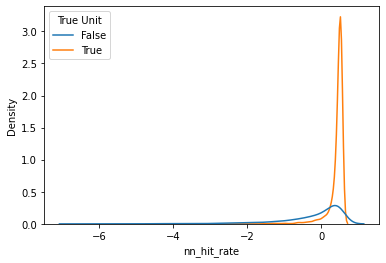

In [145]:
sns.kdeplot(data['nn_hit_rate'], hue=data['True Unit'])

<AxesSubplot:xlabel='nn_miss_rate', ylabel='Density'>

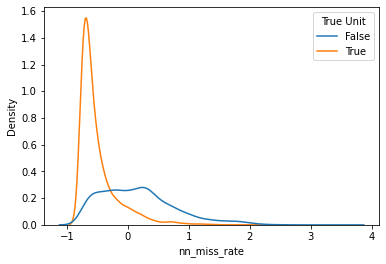

In [146]:
sns.kdeplot(data['nn_miss_rate'], hue=data['True Unit'])

<AxesSubplot:xlabel='silhouette_score', ylabel='Density'>

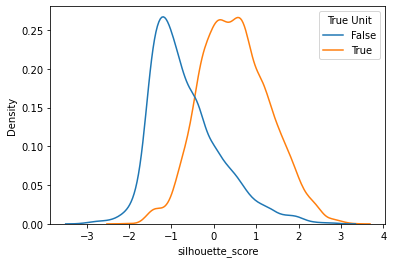

In [147]:
sns.kdeplot(data['silhouette_score'], hue=data['True Unit'])

<AxesSubplot:xlabel='l_ratio', ylabel='Density'>

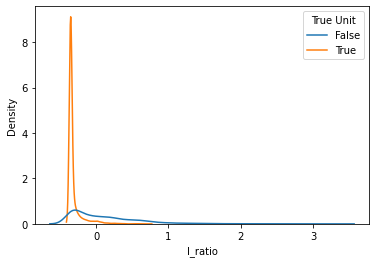

In [148]:
sns.kdeplot(data['l_ratio'], hue=data['True Unit'])

/home/mclancy/.local/share/.pyenv/versions/3.8.3/envs/truespikes/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='d_prime', ylabel='agreement_score'>

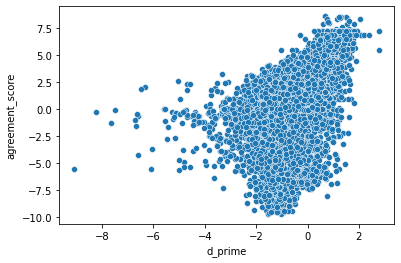

In [153]:
sns.scatterplot(data['d_prime'], y=data['agreement_score'])